<a href="https://colab.research.google.com/github/Diego251Fagundes/Data-Science-Machine-Learning-Studies/blob/main/BREAST_CANCER_SVM_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0) Importação e Configurações Globais**

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

RANDOM_STATE = 42
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# **1) Carregar Dataset**

Carrega o dataset Breast Cancer Wisconsin, que contém 569 amostras e 30 atributos. O objetivo é classificar tumores como malignos (`malignant`) ou benignos (`benign`)

In [ ]:
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target
labels = bc.target_names

# **2) Divisão de treino e teste**

Divide o dataset em conjuntos de treino (80%) e teste (20%), com a divisão estratificada para manter a distribuição de classes original

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print("Formas:", "X_train", X_train.shape, "| X_test", X_test.shape)
print("Distribuição de classes (treino):", np.bincount(y_train))
print("Distribuição de classes (teste) :", np.bincount(y_test))

Formas: X_train (455, 30) | X_test (114, 30)
Distribuição de classes (treino): [170 285]
Distribuição de classes (teste) : [42 72]


# **3) Baseline-Kernel**

# **Kernel Linear:**
O kernel linear é a escolha mais simples, adequada para dados linearmente separáveis. (Sempre deve ser o primeiro a ir a teste)

[BREAST CANCER WISCONSIN (Diagnóstico)] Linear — Acurácia: 95.61%
Preditos (10): [0 1 0 1 0 1 1 0 0 0]
Reais    (10): [0 1 0 1 0 1 1 0 0 0]


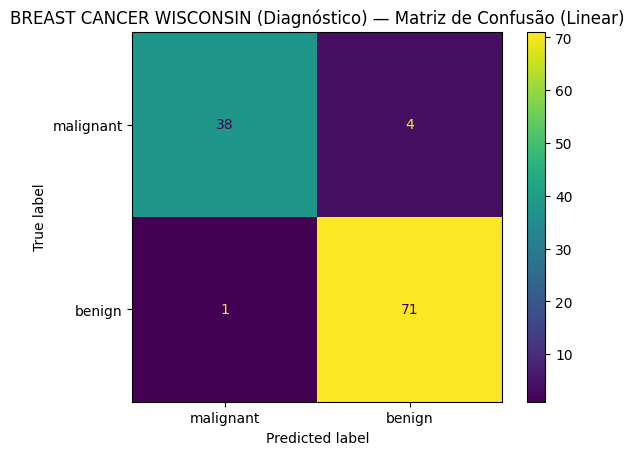

In [ ]:
model = SVC(kernel='linear', random_state=RANDOM_STATE)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"[BREAST CANCER WISCONSIN (Diagnóstico)] Linear — Acurácia: {acc*100:.2f}%")
print("Preditos (10):", y_pred[:10])
print("Reais    (10):", y_test[:10])
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels)
plt.title("BREAST CANCER WISCONSIN (Diagnóstico) — Matriz de Confusão (Linear)")
plt.show()

# **Kernel RBF:**
O kernel RBF (Radial Basis Function) é uma opção não-linear, útil quando os dados não podem ser separados por uma linha reta

[BREAST CANCER WISCONSIN (Diagnóstico)] RBF — Acurácia: 92.98%


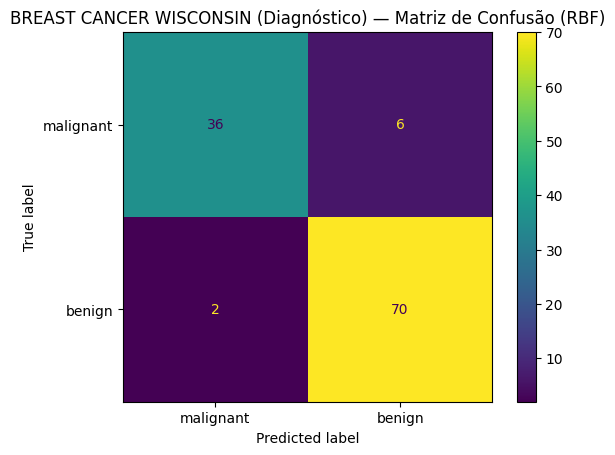

In [ ]:
model = SVC(kernel='rbf', random_state=RANDOM_STATE)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"[BREAST CANCER WISCONSIN (Diagnóstico)] RBF — Acurácia: {acc*100:.2f}%")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels)
plt.title("BREAST CANCER WISCONSIN (Diagnóstico) — Matriz de Confusão (RBF)")
plt.show()

# **GridSearchCV (apenas kernel):**
Usamos o `GridSearchCV` com validação cruzada para encontrar automaticamente o melhor tipo de kernel para o model

[BREAST CANCER WISCONSIN (Diagnóstico)] Melhor kernel (Grid kernel): linear
[BREAST CANCER WISCONSIN (Diagnóstico)] Acurácia teste (melhor kernel): 95.61%


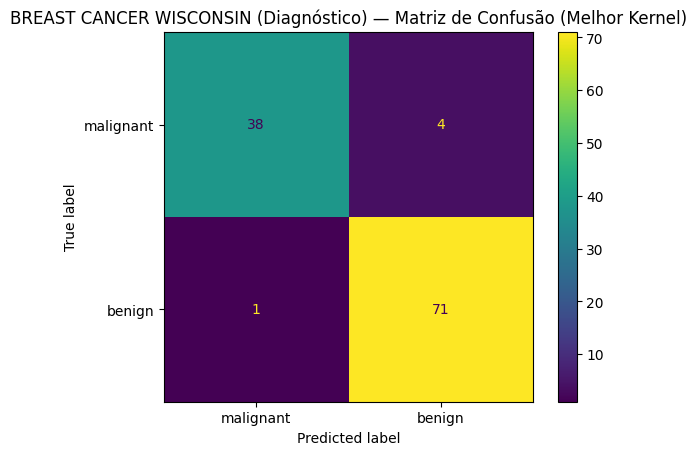

In [ ]:
gs = GridSearchCV(
    SVC(random_state=RANDOM_STATE),
    param_grid={'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
    cv=cv, n_jobs=-1
)
gs.fit(X_train, y_train)
best_kernel = gs.best_params_['kernel']
y_pred = gs.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("[BREAST CANCER WISCONSIN (Diagnóstico)] Melhor kernel (Grid kernel):", best_kernel)
print(f"[BREAST CANCER WISCONSIN (Diagnóstico)] Acurácia teste (melhor kernel): {acc*100:.2f}%")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels)
plt.title("BREAST CANCER WISCONSIN (Diagnóstico) — Matriz de Confusão (Melhor Kernel)")
plt.show()

# **4) Varreduras simples em CV**

Aqui, avaliamos o desempenho do modelo para o dataset Breast Cancer com diferentes hiperparâmetros usando validação cruzada.

# **Linear: variação de C:**
Avaliamos o kernel linear com diferentes valores de C, que controla a penalização por erros no treino

In [ ]:
Cs = [0.1, 1, 10, 100]
print("[BREAST CANCER WISCONSIN (Diagnóstico)] CV média (Linear) variando C:")
for C in Cs:
    scores = cross_val_score(SVC(kernel='linear', C=C, random_state=RANDOM_STATE), X, y, cv=cv, n_jobs=-1)
    print(f"  C={C}: mean={scores.mean():.4f}")

[BREAST CANCER WISCONSIN (Diagnóstico)] CV média (Linear) variando C:
  C=0.1: mean=0.9421
  C=1: mean=0.9473
  C=10: mean=0.9578
  C=100: mean=0.9631


# **RBF: variação de C e gamma:**
Avaliamos o kernel RBF com diferentes combinações de C e gamma, que controlam a penalização de erros e a largura de influência do hiperplano, respectivamente

In [ ]:
Cs_rbf = [0.1, 1, 10]
gammas = [0.01, 0.1, 1]
print("[BREAST CANCER WISCONSIN (Diagnóstico)] CV média (RBF) variando C e gamma:")
for C in Cs_rbf:
    for gamma in gammas:
        scores = cross_val_score(SVC(kernel='rbf', C=C, gamma=gamma, random_state=RANDOM_STATE), X, y, cv=cv, n_jobs=-1)
        print(f"  C={C}, gamma={gamma}: mean={scores.mean():.4f}")

[BREAST CANCER WISCONSIN (Diagnóstico)] CV média (RBF) variando C e gamma:
  C=0.1, gamma=0.01: mean=0.6274
  C=0.1, gamma=0.1: mean=0.6274
  C=0.1, gamma=1: mean=0.6274
  C=1, gamma=0.01: mean=0.6309
  C=1, gamma=0.1: mean=0.6274
  C=1, gamma=1: mean=0.6274
  C=10, gamma=0.01: mean=0.6292
  C=10, gamma=0.1: mean=0.6274
  C=10, gamma=1: mean=0.6274


# **5) GridSearchCV completo (kernel + C + gamma)**

In [ ]:
gs_full = GridSearchCV(
    SVC(random_state=RANDOM_STATE),
    param_grid={'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                 'C': [0.1, 1, 10],
                 'gamma': ['scale', 0.01, 0.1, 1]},
    cv=cv, n_jobs=-1
)
gs_full.fit(X_train, y_train)
y_pred = gs_full.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("[BREAST CANCER WISCONSIN (Diagnóstico)] Melhor combinação (Grid completo):", gs_full.best_params_)
print(f"[BREAST CANCER WISCONSIN (Diagnóstico)] Acurácia teste (Grid completo): {acc*100:.2f}%")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels)
plt.title("BREAST CANCER WISCONSIN (Diagnóstico) — Matriz de Confusão (Grid Completo)")
plt.show()